# **# Importing Libraries & Data Extraction..**

In [1]:
import glob
import warnings
warnings.filterwarnings("ignore")
import spacy
import pickle
import random
import docs
from spacy import displacy
import spacy
from spacy import schemas
from spacy import Dict
from spacy import displacy
from spacy.lang.en.stop_words import  STOP_WORDS
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import doc
import re
import re
import nltk
from nltk.corpus import stopwords
import glob
import doc
!pip install PyPDF2
from PyPDF2 import PdfFileReader
import re
import re
import nltk
!pip install pdfplumber
import pdfplumber

ModuleNotFoundError: No module named 'docs'

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
antiword is already the newest version (0.37-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os,re
import docx2txt
import textract
import pandas as pd
import numpy as np
from docx import Document
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
os.listdir('/content/drive/MyDrive/Resumes')

['React Developer_Kamalakar Reddy.docx',
 'React Dev_Krishna Kanth.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'Reactjs Developer_M Lokesh.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Deepakreddy.docx',
 'React Developer_Vinay Reddy.doc',
 'React Developer_Thirupathiamma.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Internship_Ravali_Musquare Technologies (1).docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'React Developer_Naveen sadhu.docx',
 'React Developer_Pragnya.docx',
 'Reactjs Developer_MD Khizarud

In [5]:
file_path = []
category = []

In [6]:
directory = '/content/drive/MyDrive/Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer Resume')

In [7]:
file_path, category

(['KAMALAKAR REDDY. A \n\nLinked In: https://www.linkedin.com/in/kamalakar-reddy-777682196/ \n\nPROFESSIONAL SUMMARY \n\n● 3 years of experience in UI Development of Enterprise Applications, Web Applicationsrelated technologies. \n\n● Experience in Development, Coding, Maintenance,Design, Implementation of Web applications using HTML5, CSS3, JavaScript, j Query, React JS, Redux. \n\n● Well versed in designing websites, Web Applications. \n\n● Well versed in different Project Management Tools e.g. JIRA, GIT, Bit bucket. ● Tested cross browser design issues and fixed major layout bugs for supported browsers. ● Self-motivated with good communication and interpersonalskills. \n\n● Ability to work independently and multitasking without negative impact to timelines orquality. \n\nWORK EXPERIENCE \n\nMARCH 2021 – TILL DATE \n\nROLE : : UI DEVELOPER \n\nENLUME TECHNOLOGIES, HYDERABAD. \n\nAUGUST 2018 – MARCH 2021 \n\nROLE : SOFTWARE ENGINEER \n\nFORTUNAPIX PRIVATE LIMITD, HYDERABAD. \n\nPROJEC

In [8]:
file_path_1 = []
category_1 = [] 

In [9]:
directory_1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('PeopleSoft Resume')

In [10]:
file_path_1, category_1

(['\nRahul Ahuja\n----------------------------------------------------------------------------\n-----------------------------------------------\nSummary:\n\n    • 10.2 years of experience in PeopleSoft as a Technical Consultant.\n    • Customization of  PeopleSoft  application  using  PeopleSoft  8.x,9.x,\n      People Tools.\n    •  In-depth  knowledge  in  PeopleTools   like   Application   Designer,\n      PeopleCode, Application Engine, Application Package, PS Security, File\n      layout,  XML  Publisher,  Data  Mover,  Integration  Broker,  Workflow\n      Notification, AWE, Web Services.\n    • Worked extensively on Application  Engine,  PeopleCdoe,  File  Layout,\n      Application Package, AWE, Env Refresh and Upgrade activities.\n    • Experience in Implementation of projects.\n    • Fair Knowledge in PeopleSoft Reporting Tools such as PS/Query.  Worked\n      on Component Interface.\n    • Excellent knowledge in Agile Methodology.\n    • Self motivated person with  strong  d

In [11]:
file_path_2 = []
category_2 = []

In [12]:
directory_2 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Lightning Insight Resume')

In [13]:
file_path_2, category_2

(["BUDDHA VAMSI                                                            \n\n\n\nCAREER OBJECTIVE:\n\n\n\nHave 2.11 years of IT experience as Database Engineer and currently working in Fluentgrid Limited Visakhapatnam from August 2018 as Database Engineer.\n\n Having good hands on SQL, PLSQL at various databases like Oracle, MS Sql Server.\n\nExpertise in creating/modifying Tables, Views, Stored Procedures, Functions and indexes.\n\nHaving knowledge on Triggers, Temporary tables, CTE Recursive Methods.\n\nExpertise in writing transformations (ETL) using Business Intelligence tools like Pentaho Kettle.\n\n\n\n\n\n\n\nEXPERIENCE : \n\nMS-SQL,PL/SQL-Oracle DEVELOPER Aug-2018-Present\n\nFLUENTGRID LIMITED, Visakhapatnam\n\nDesigned the database architecture for client projects.\n\nIm Working with NDMC,KESCO,UPPCL,UGVCL,Bosch Smart electricity Power utility projects.\n\nDeveloped  Data Flow Diagrams and data structure diagrams.\n\nConfigured,tuned and maintained MS-SQL Server database ser

In [14]:
file_path_3 = []
category_3 = []

In [15]:
directory_3 = '/content/drive/MyDrive/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resume')

In [16]:
file_path_3, category_3

(['\nShireesh                                                            Balasani\n\n\nHCM Consultant\n\n\n\nPROFILE SUMMARY:\n • HCM Tester and Consultant with 10 plus years of experience into  WORKDAY,\n   ZENEFITS and HR Activities, which includes hands on Experience in Workday\n   Functional and Technical for more than 4 years.\n • Experience on E2E on Benefits, OE, Time tracking and Absence Modules  and\n   HR Transformations.\n • Having experience in Functional testing on Benefits,  Time  Tracking  and\n   Absence.\n •  Experience  in  Define,  build  and  implement  enhancements  to  HR/P&O\n   processes and structures that will improve the P&O  function’s  alignment\n   to business objectives and ability to help drive business results.\n • Owned/Participated in the following key activities:  Release  Management,\n   Regression   Testing,   Tenant    Management,    Data    Upload,    Major\n   Outage/Communication/Updates and Incident Management. Manage  Application\n   Life Cyc

# **# Text Into DataFrame..**

In [66]:
data = pd.DataFrame(data =file_path , columns = ['Resumes'])

In [67]:
data['category'] = category
data

,Resumes,category
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
2,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
4,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
5,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
6,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume
7,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume
8,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume
9,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume


In [68]:
data_1 = pd.DataFrame(data = file_path_1 , columns = ['Resumes'])
data_1['category_1'] = category_1
data_1

,Resumes,category_1
0,\nRahul Ahuja\n-------------------------------...,PeopleSoft Resume
1,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft Resume
2,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft Resume
3,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,PeopleSoft Resume
4,\n\nR Ahmed\n PeopleS...,PeopleSoft Resume
5,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft Resume
6,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft Resume
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft Resume
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft Resume
9,\n PEOPLESOFT Adminis...,PeopleSoft Resume


In [69]:
data_2 = pd.DataFrame(data = file_path_2 , columns = ['Resumes'])
data_2['category_2'] = category_2
data_2

,Resumes,category_2
0,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resume
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning Insight Resume
2,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resume
3,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Lightning Insight Resume
4,KAMBALLA PRADEEP ...,SQL Developer Lightning Insight Resume
5,\n SQL S...,SQL Developer Lightning Insight Resume
6,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning Insight Resume
7,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning Insight Resume
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer Lightning Insight Resume
9,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning Insight Resume


In [70]:
data_3 = pd.DataFrame(data = file_path_3 , columns = ['Resumes'])
data_3['category_3'] = category_3
data_3

,Resumes,category_3
0,\nShireesh ...,Workday Resume
1,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday Resume
2,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
3,\nVenkateswarlu.B ...,Workday Resume
4,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday Resume
5,\n Hari Krishna ...,Workday Resume
6,Workday HCM Techno functional Consultant ...,Workday Resume
7,\n[pic] Name...,Workday Resume
8,\n\n Madeeswar A\n...,Workday Resume
9,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resume


In [71]:
df = data.append([data_1, data_2, data_3], ignore_index = True)

In [72]:
df

,Resumes,category,category_1,category_2,category_3
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN
2,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,NaN,NaN,NaN
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,NaN,NaN,NaN
4,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,G Himaja\n\n ...,NaN,NaN,NaN,Workday Resume
75,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,NaN,NaN,NaN,Workday Resume
76,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,NaN,NaN,NaN,Workday Resume
77,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resume


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resumes     79 non-null     object
 1   category    24 non-null     object
 2   category_1  20 non-null     object
 3   category_2  14 non-null     object
 4   category_3  21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [74]:
df['Category'] = category + category_1 + category_2 + category_3
df

,Resumes,category,category_1,category_2,category_3,Category
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,G Himaja\n\n ...,NaN,NaN,NaN,Workday Resume,Workday Resume
75,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,NaN,NaN,NaN,Workday Resume,Workday Resume
76,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,NaN,NaN,NaN,Workday Resume,Workday Resume
77,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resume,Workday Resume


In [75]:
df.drop(['category', 'category_1', 'category_2', 'category_3'], axis = 1, inplace = True)
df

,Resumes,Category
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
2,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
4,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
...,...,...
74,G Himaja\n\n ...,Workday Resume
75,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,Workday Resume
76,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume
77,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resume


In [76]:
df.head()

,Resumes,Category
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
2,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
4,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume


In [77]:
df.tail()

,Resumes,Category
74,G Himaja\n\n ...,Workday Resume
75,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,Workday Resume
76,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume
77,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resume
78,Name : Gopi Krishna Reddy\n\n\t\t ...,Workday Resume


In [78]:
df.isna().count()

Resumes     79
Category    79
dtype: int64

# **EDA & Text Pre-Processing**

In [79]:
def preprocess(txt):
    txt = txt.lower()                                                             # convert all characters in the string to lower case
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                           # remove non-english characters, punctuation and numbers
    txt = re.sub('http\S+\s*', ' ', txt)                                          # remove URLs
    txt = re.sub('RT|cc', ' ', txt)                                               # remove RT and cc
    txt = re.sub('#\S+', '', txt)                                                 # remove hashtags
    txt = re.sub('@\S+', '  ', txt)                                               # remove mentions
    txt = re.sub('\s+', ' ', txt)                                                 # remove extra whitespace
    txt = nltk.tokenize.word_tokenize(txt)                                        # tokenize word
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]     # remove stop words
    return ' '.join(txt)                                                         # stemming

In [80]:
df['Resumes'] = df['Resumes'].apply(lambda w: preprocess(w))

In [81]:
df.to_csv('Resume.csv', index=False)

In [82]:
pd.read_csv('Resume.csv')

,Resumes,Category
0,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume
1,ui developer react js developer name krishna p...,React JS Developer Resume
2,kotani durga prasad objective aspirant positio...,React JS Developer Resume
3,mareedu lokesh babu professional overview arou...,React JS Developer Resume
4,haripriya battina experience ui developer reac...,React JS Developer Resume
...,...,...
74,g himaja career objective work towards achievi...,Workday Resume
75,hima mendu career objective continue growing k...,Workday Resume
76,chinna subbarayudu dob th march nationality in...,Workday Resume
77,harikrishna akula summary years experience aro...,Workday Resume


In [83]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 143), ('role', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('studio', 128), ('core', 128), ('work', 124), ('custom', 124), ('js', 123

In [84]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [85]:
df.Category.value_counts()

React JS Developer Resume                 24
Workday Resume                            21
PeopleSoft Resume                         20
SQL Developer Lightning Insight Resume    14
Name: Category, dtype: int64

In [86]:
 import numpy as np
 import pandas as pd
 #import matplotlib.pyplot as plt
 from PIL import Image
 #from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
os.system =('curl -O https://ik.imagekit.io/taw2awb5ntf/wp-content/uploads/2021/01/word-cloud-mask.jpg')
file = plt.imread('word-cloud-mask.jpg')

In [ ]:
print('Data shape:',file.shape)
print('Data type:',type(file))

Data shape: (500, 500)
Data type: <class 'numpy.ndarray'>


In [ ]:
mask=np.array(Image.open('word-cloud-mask.jpg'))
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 255:
        return 0
    else:
        return val

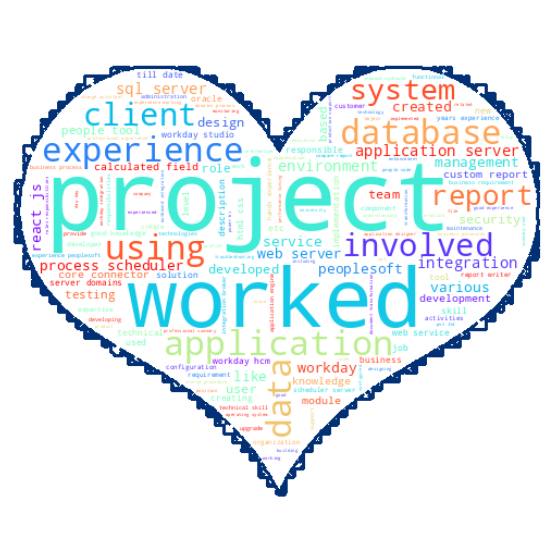

In [ ]:

#wc = WordCloud(width = 3000, height = 2000,background_color="white", max_words=100,stopwords=oneSetOfStopWords,contour_width=1)

wc = WordCloud(stopwords='mostcommon',background_color='white', max_words=1000,contour_color='#023075',mask=mask,contour_width=3,colormap='rainbow',height = 2000,width = 3000).generate(cleanedSentences)
# create image as cloud
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()

In [ ]:
categories = np.sort(df['Category'].unique())
categories

array(['PeopleSoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [ ]:
df_categories = [df[df['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
df_categories

[                                              Resumes           Category
 24  rahul ahuja summary years experience peoplesof...  PeopleSoft Resume
 25  peoplesoft admin varkala vikas career objectiv...  PeopleSoft Resume
 26  priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft Resume
 27  arun venu experience summary experience years ...  PeopleSoft Resume
 28  r ahmed peoplesoft technical consultant profes...  PeopleSoft Resume
 29  murali professional summary years experience p...  PeopleSoft Resume
 30  priyabrata hota career objective pursuing peop...  PeopleSoft Resume
 31  c n c address manyata tech park nagavara banga...  PeopleSoft Resume
 32  hari narayana professional summary years exper...  PeopleSoft Resume
 33  peoplesoft administrator srinivas k experience...  PeopleSoft Resume
 34  sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft Resume
 35  peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft Resume
 36  personal details name pritam bisw

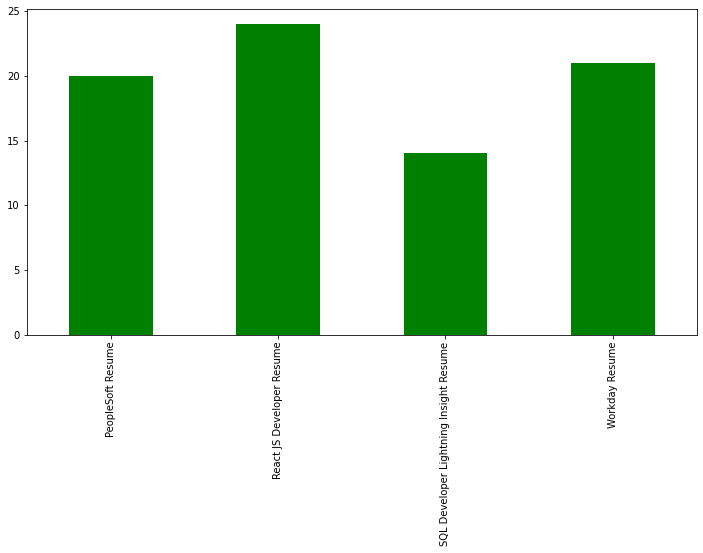

In [ ]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6),color ='green')
plt.show()

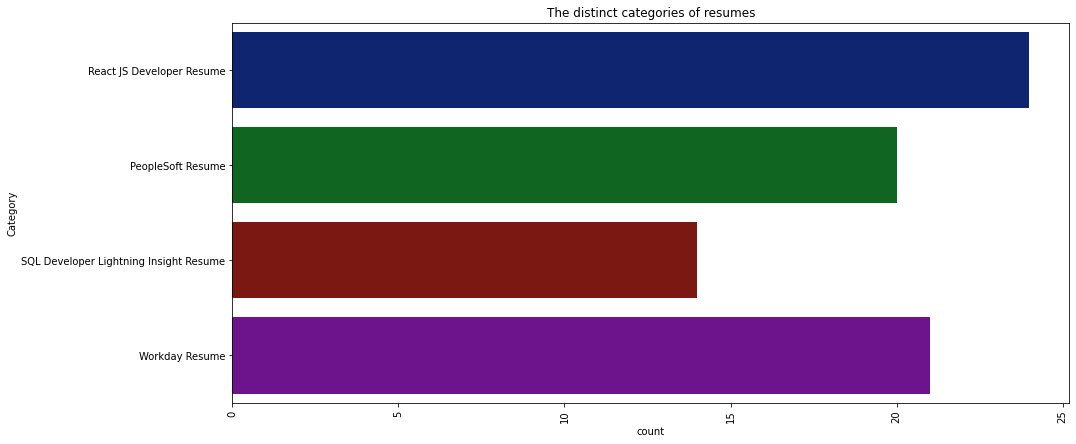

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,7))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df,color=None)
plt.show()

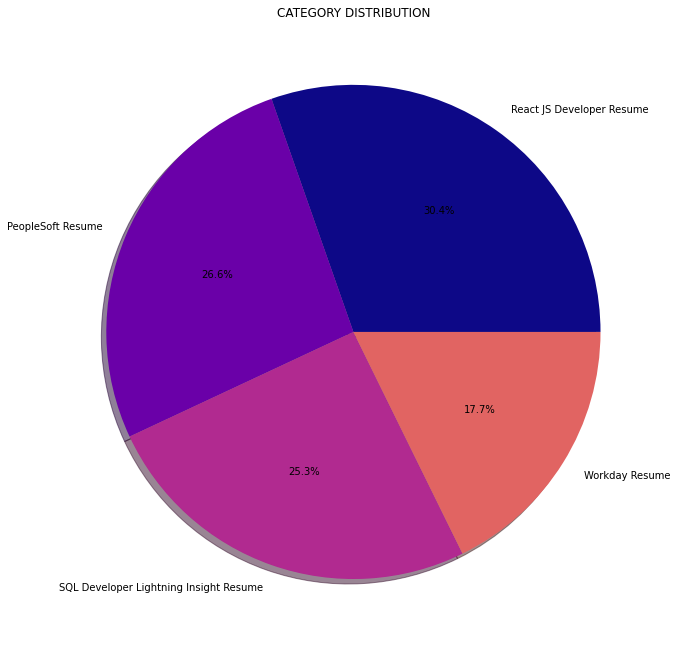

In [ ]:
import numpy as np
from matplotlib.gridspec import GridSpec
targetCounts = df.Category.value_counts()
targetLabels  = df.Category.unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
plt.style.use('seaborn-dark-palette')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [ ]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP,mask=mask,background_color='white',contour_color='#023075'
    ).generate(txt)

    return wordcloud

In [ ]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

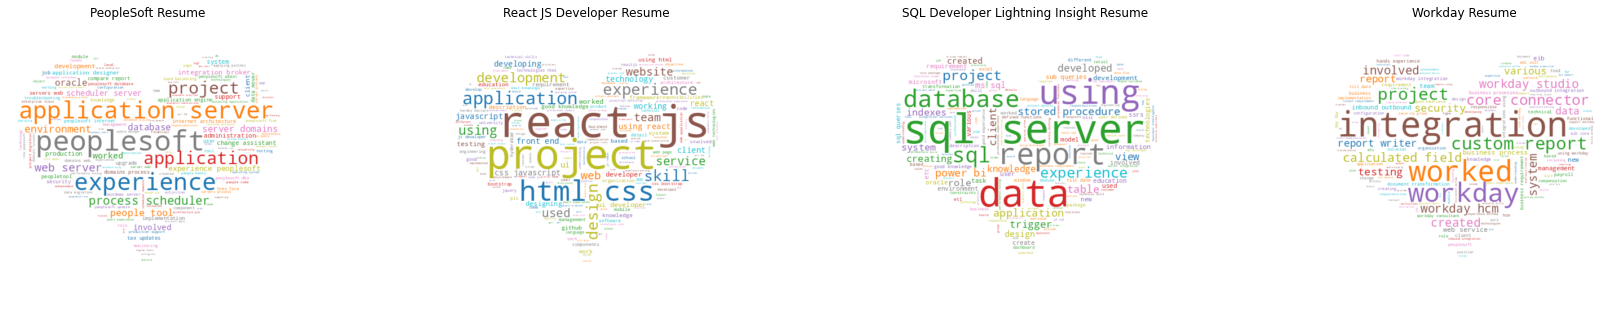

In [ ]:
plt.figure(figsize=(38, 30))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.plot()
# store to file
plt.savefig("cloud.png", format="png")
plt.show()

In [ ]:
def wordfreq(df):
    count = df['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

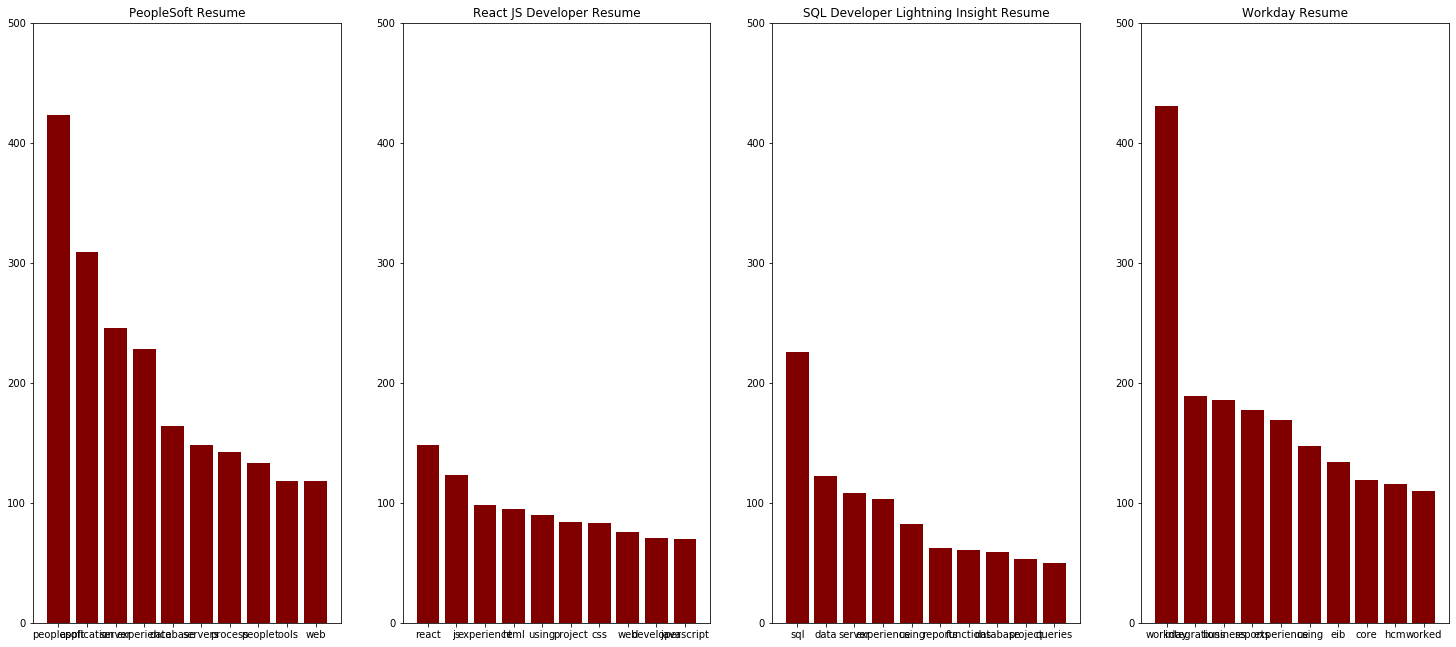

In [ ]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'],color ='maroon')
    plt.style.use('_classic_test_patch')
    plt.ylim(0, 500)

plt.show()
plt.close()

# **Caculating each Characterstic in dataframe**

In [ ]:
characters=df["Resumes"].apply(len)
characters

0     2143
1     3039
2     4250
3     1821
4     1980
      ... 
74    4026
75    3024
76    5073
77    5874
78    3786
Name: Resumes, Length: 79, dtype: int64

In [ ]:
print('Mean of each characters in datset:',characters.mean())
print('Median of characters in dataset:',characters.median())
print('Standard Deviation of characters in dataset:',characters.std())
print('skew of characters dataset:',characters.skew())
print('sum of characters dataset:',characters.sum())

Mean of each characters in datset: 4205.46835443038
Median of characters in dataset: 3555.0
Standard Deviation of characters in dataset: 2493.695603920286
skew of characters dataset: 1.789184917351574
sum of characters dataset: 332232


In [ ]:
characters.describe()

count       79.000000
mean      4205.468354
std       2493.695604
min       1200.000000
25%       2465.500000
50%       3555.000000
75%       5253.000000
max      14538.000000
Name: Resumes, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


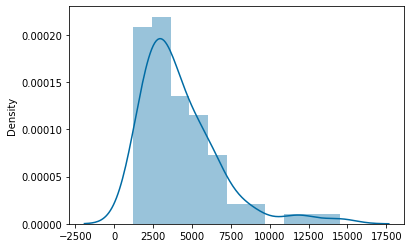

In [ ]:
sns.distplot(x = characters)

# **Caculating each Word Characterstic in dataframe**

In [ ]:
words = df['Resumes'].apply(lambda x: len(str(x).split(' ')))
words

0     265
1     415
2     553
3     232
4     255
     ... 
74    502
75    356
76    632
77    741
78    466
Name: Resumes, Length: 79, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


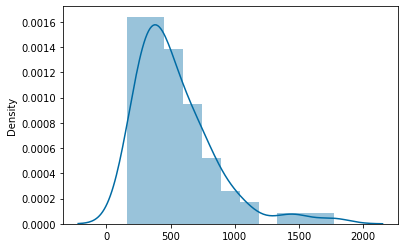

In [ ]:
sns.distplot(x = words)

In [ ]:
print('Mean of each words in datset:',words.mean())
print('Median of words in dataset:',words.median())
print('Standard Deviation of words in dataset:',words.std())
print('skew of words dataset:',words.skew())
print('sum of words dataset:', words.sum())

Mean of each words in datset: 530.3417721518987
Median of words in dataset: 459.0
Standard Deviation of words in dataset: 302.6979914071903
skew of words dataset: 1.7114215467749754
sum of words dataset: 41897


In [ ]:
words.describe()

count      79.000000
mean      530.341772
std       302.697991
min       159.000000
25%       327.000000
50%       459.000000
75%       669.000000
max      1771.000000
Name: Resumes, dtype: float64

In [ ]:
freq_Sw = pd.Series(' '.join(df['Resumes']).split()).value_counts() 
freq_Sw

experience     598
peoplesoft     453
workday        431
application    418
using          395
              ... 
sqoop            1
less             1
pig              1
eco              1
foods            1
Length: 4574, dtype: int64

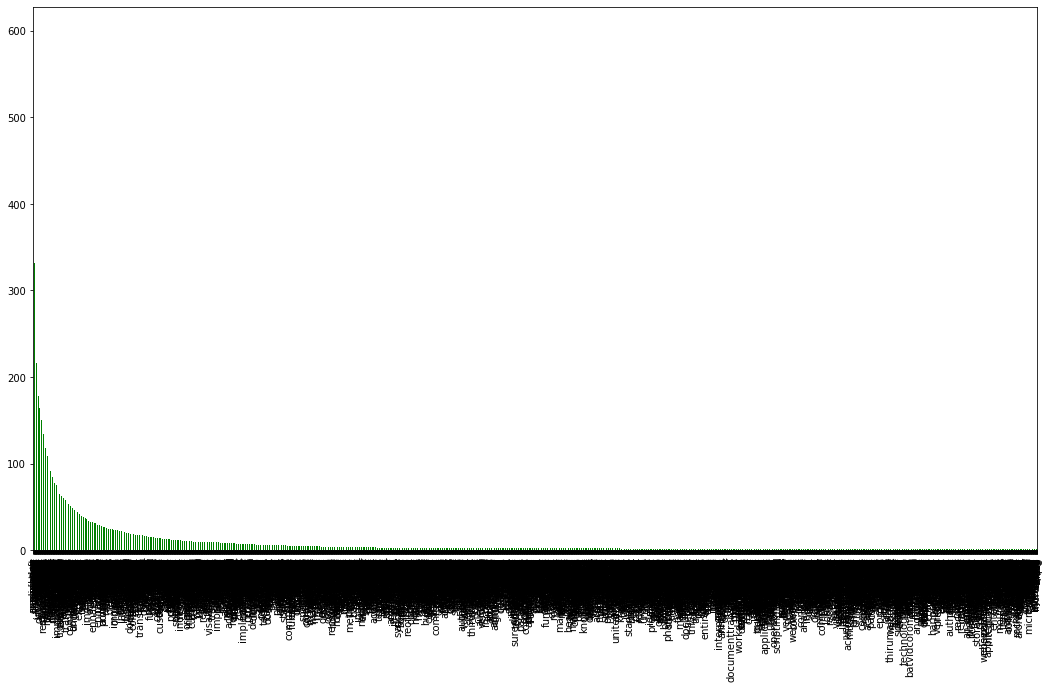

In [ ]:
freq_Sw.plot(kind = 'bar',figsize=(18,10),color='green')


In [ ]:
len_resume = df['Resumes'].astype(str).apply(len)
len_resume

0     2143
1     3039
2     4250
3     1821
4     1980
      ... 
74    4026
75    3024
76    5073
77    5874
78    3786
Name: Resumes, Length: 79, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


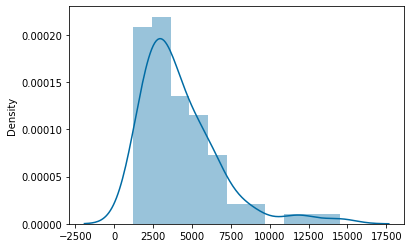

In [ ]:
sns.distplot(x = len_resume)

In [ ]:
from collections import Counter
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


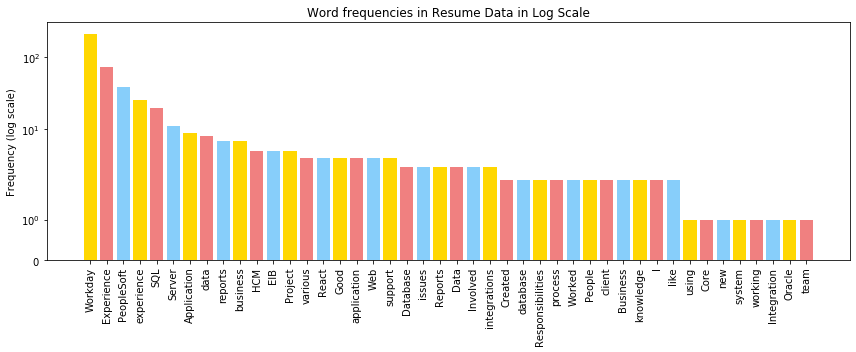

In [ ]:
words =['using','Workday','Experience','PeopleSoft',
 'experience','SQL','Application','data','Server',
 'business','Project','reports','like','HCM','Worked',
 'knowledge','Involved','various','Good', 'Reports','React','EIB','integrations','Web','system','creating','issues',
 'Created', 'Responsibilities','Process','process','support', 
 'application','new','People','I','team','working', 
 'Database','database','Integration','Domains','client', 
 'requirements','Core',  'Business', 
'Oracle','Report', 'Developer', 'Data']
indices = np.random.zipf(1.6, size=500).astype(np.int) % len(words)
tw = np.array(words)[indices]

tf = Counter(tw)

y = [count for tag, count in tf.most_common(50)]
x = [tag for tag, count in tf.most_common(50)]
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
plt.bar(x, y, color=['gold','lightcoral', 'lightskyblue'])
plt.title("Word frequencies in Resume Data in Log Scale")
plt.ylabel("Frequency (log scale)")
plt.yscale('symlog') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
#for i, (tag, count) in enumerate(tf.most_common(50)):
    #plt.text(i, count, f' {count} ', rotation=90,
             #ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
#plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [ ]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

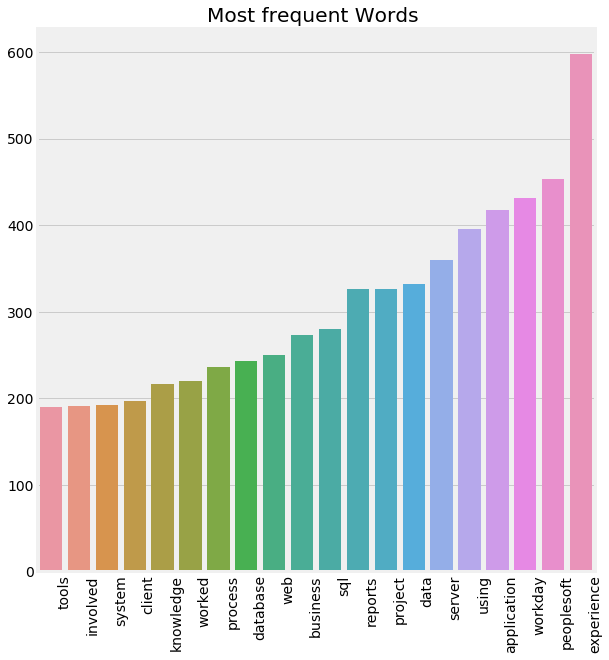

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction_1(df,"Resumes","Most frequent Words ")

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [ ]:

df

,Resumes,Category
0,kamalakar reddy linked www linkedin com kamala...,1
1,ui developer react js developer name krishna p...,1
2,kotani durga prasad objective aspirant positio...,1
3,mareedu lokesh babu professional overview arou...,1
4,haripriya battina experience ui developer reac...,1
...,...,...
74,g himaja career objective work towards achievi...,3
75,hima mendu career objective continue growing k...,3
76,chinna subbarayudu dob th march nationality in...,3
77,harikrishna akula summary years experience aro...,3


In [ ]:
targetCounts = df['Category'].value_counts().reset_index()['Category']
targetLabels  = df['Category'].value_counts().reset_index()['index']

In [ ]:
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [ ]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

In [ ]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==wordfreqdist[i]):
        same=same+1
    elif(lem_words[i]!=wordfreqdist[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 1832
Number of words not Lemmatized= 0


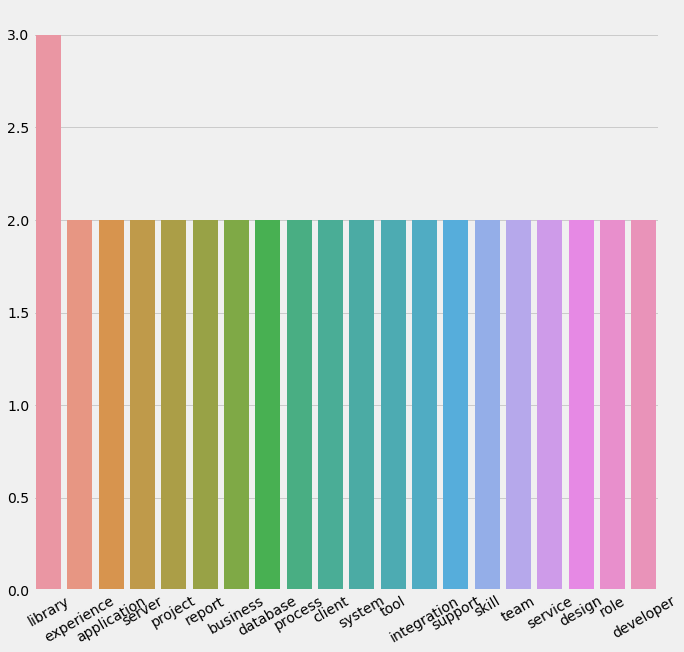

In [ ]:
all_fdist = nltk.FreqDist(lem_words).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

# **Vectorisation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
"""""""""
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    
    ngram_range=(1, 1),
    max_features=2000)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    
    ngram_range=(2, 6),
    max_features=2000)
char_vectorizer.fit(requiredText)
CharFeatures = char_vectorizer.transform(requiredText)
totalFeatures = hstack([WordFeatures, CharFeatures])
"""""""""

"\nword_vectorizer = TfidfVectorizer(\n    sublinear_tf=True,\n    strip_accents='unicode',\n    analyzer='word',\n    token_pattern=r'\\w{1,}',\n    \n    ngram_range=(1, 1),\n    max_features=2000)\nword_vectorizer.fit(requiredText)\nWordFeatures = word_vectorizer.transform(requiredText)\n\nchar_vectorizer = TfidfVectorizer(\n    sublinear_tf=True,\n    strip_accents='unicode',\n    analyzer='char',\n    \n    ngram_range=(2, 6),\n    max_features=2000)\nchar_vectorizer.fit(requiredText)\nCharFeatures = char_vectorizer.transform(requiredText)\ntotalFeatures = hstack([WordFeatures, CharFeatures])\n"

In [ ]:
#print(totalFeatures)

# **TF-IDF**

In [ ]:
requiredText = df["Resumes"]
requiredTarget = df["Category"].values


#word_vectorizer = TfidfVectorizer()
#word_vectorizer.fit(requiredText)
#WordFeatures = word_vectorizer.fit_transform(requiredText)

word_vectorizer = TfidfVectorizer(smooth_idf=True,analyzer='word',sublinear_tf=True,stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.fit_transform(requiredText)


#
#min_df=3,  max_features=None, 
            #strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            #ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            #stop_words = 'english'
#ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            #ngram_range=(1, 3), stop_words = 'english')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,stratify=requiredTarget,random_state=42, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(55, 1500)
(24, 1500)


# **Bag Of Words**

In [ ]:
vectorizer=CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',stop_words = 'english')
bag = vectorizer.fit_transform(requiredText)

In [ ]:
vectorizer.vocabulary_

{'kamalakar': 2119,
 'reddy': 3272,
 'linked': 2245,
 'www': 4448,
 'linkedin': 2246,
 'com': 690,
 'professional': 3081,
 'summary': 3887,
 'years': 4465,
 'experience': 1407,
 'ui': 4173,
 'development': 1094,
 'enterprise': 1317,
 'applications': 193,
 'web': 4375,
 'applicationsrelated': 194,
 'technologies': 3990,
 'coding': 671,
 'maintenance': 2324,
 'design': 1068,
 'implementation': 1886,
 'using': 4228,
 'html': 1829,
 'css': 919,
 'javascript': 2073,
 'j': 2064,
 'query': 3188,
 'react': 3237,
 'js': 2103,
 'redux': 3282,
 'versed': 4290,
 'designing': 1073,
 'websites': 4386,
 'different': 1110,
 'project': 3098,
 'management': 2335,
 'tools': 4076,
 'e': 1209,
 'g': 1599,
 'jira': 2080,
 'git': 1636,
 'bit': 414,
 'bucket': 474,
 'tested': 4019,
 'cross': 911,
 'browser': 469,
 'issues': 2056,
 'fixed': 1516,
 'major': 2326,
 'layout': 2190,
 'bugs': 478,
 'supported': 3905,
 'browsers': 470,
 'self': 3560,
 'motivated': 2507,
 'good': 1663,
 'communication': 712,
 'interp

In [ ]:
print(vectorizer.get_feature_names())

['abdul', 'abilities', 'ability', 'able', 'abreast', 'abs', 'absence', 'absent', 'abstract', 'abstraction', 'academic', 'academics', 'achieve', 'achieved', 'achievement', 'achievements', 'achieving', 'acknowledged', 'acknowledgement', 'acquainted', 'acquire', 'acquisition', 'acs', 'action', 'actionable', 'actions', 'activated', 'activating', 'active', 'actively', 'activities', 'activity', 'acts', 'ad', 'adapt', 'adaptability', 'adaptive', 'add', 'added', 'adding', 'additional', 'additionally', 'additive', 'addm', 'address', 'addressing', 'adept', 'adhere', 'adhering', 'adhoc', 'aditya', 'admin', 'adminissions', 'administer', 'administering', 'administrating', 'administration', 'administrative', 'administrator', 'admission', 'ado', 'adobe', 'adopt', 'adopting', 'adp', 'adult', 'advance', 'advanced', 'advancement', 'advantage', 'advice', 'ae', 'aeroplanes', 'aetna', 'affecting', 'affigent', 'affiliated', 'affirm', 'aforementioned', 'ag', 'age', 'agent', 'aggregate', 'aggregator', 'agile'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import numpy as np
 
X=bag.toarray()
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X,requiredTarget, stratify=requiredTarget,random_state=42, test_size=0.3)

In [ ]:
vectorizer1 = CountVectorizer(min_df = 1, max_df = 0.9)
count_vect = vectorizer1.fit_transform(df["Resumes"])
word_freq_df = pd.DataFrame({'term': vectorizer1.get_feature_names(), 'occurrences':np.asarray(count_vect.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,occurrences,frequency
0,abdul,3,0.000074
1,abilities,5,0.000124
2,ability,41,0.001018
3,able,2,0.000050
4,abreast,1,0.000025
...,...,...,...
4549,zenefits,3,0.000074
4550,zero,1,0.000025
4551,zerozilla,2,0.000050
4552,zones,1,0.000025


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


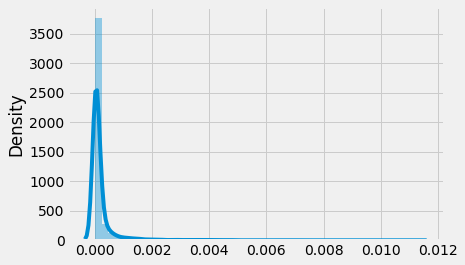

In [ ]:
sns.distplot(x =[word_freq_df['frequency']])

In [ ]:
vectorizer2 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer2.fit_transform(df["Resumes"])
names_features = vectorizer2.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df12 = pd.DataFrame(denselist, columns = names_features)
df12

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ability,absence,academic,achieve,achievements,active,activities,activity,add,adding,...,world,write,writer,writing,written,xml,xp,xslt,xtt,year
0,0.054122,0.000000,0.000000,0.000000,0.000000,0.000000,0.090512,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.041942,0.000000,0.000000,0.000000,0.022661
2,0.086925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.070483,0.041202,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.090535,0.000000,0.093632,0.000000,0.051286,0.0,0.000000,0.000000,...,0.202042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.028612,0.000000,0.000000,0.042234,0.000000,0.000000,0.023925,0.0,0.000000,0.036673,...,0.000000,0.000000,0.032059,0.000000,0.040927,0.059335,0.040927,0.234019,0.000000,0.000000
75,0.032529,0.000000,0.000000,0.000000,0.000000,0.000000,0.027200,0.0,0.048016,0.000000,...,0.000000,0.000000,0.036448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
76,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.029555,...,0.000000,0.000000,0.077507,0.048720,0.000000,0.119543,0.000000,0.080826,0.000000,0.000000
77,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054873,0.0,0.000000,0.028038,...,0.000000,0.000000,0.073529,0.000000,0.000000,0.090726,0.000000,0.102236,0.112936,0.000000


# **Model Building || Model Training || Model Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly as py
from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objs as go

# **1.LogisticRegression**

In [ ]:
lr = LogisticRegression(class_weight ='balanced',multi_class='ovr',solver='lbfgs',C=100.0)
lr.fit(X_train, y_train)
lr_train_predict=lr.predict(X_train)
lr_prediction = lr.predict(X_test)
lr_score = lr.score(X_test,y_test)
print("Logistic Regression Train Accuracy: {}%".format(round(lr.score(X_train,y_train)*100,2)))
print("Logistic Regression Test Accuracy: {}%".format(round(lr.score(X_test,y_test)*100,2)))
lr_cm = confusion_matrix(y_test, lr_prediction)
print("Classification Report:Train Data\n")
print(classification_report(y_train, lr_train_predict))
print("-----------------------------------------------------------\n")
print("Classification Report:Test Data\n")
print(classification_report(y_test, lr_prediction))

Logistic Regression Train Accuracy: 100.0%
Logistic Regression Test Accuracy: 95.83%
Classification Report:Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

-----------------------------------------------------------

Classification Report:Test Data

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           0.96        24
   macro avg       0.97   

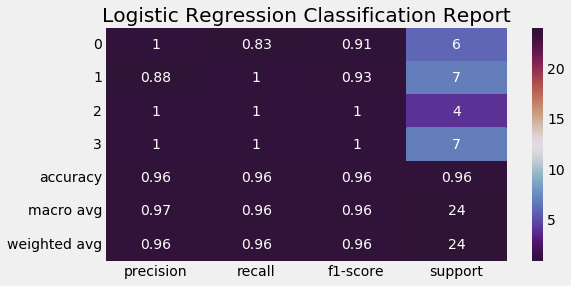

In [ ]:
clf_report = classification_report(y_test, lr_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap="twilight_shifted")
plt.title("Logistic Regression Classification Report")
plt.show()

# **2.Support Vector Machine**

In [ ]:
svm =OneVsRestClassifier(SVC(C=1.0,kernel='linear',degree=3,gamma='scale',class_weight ='balanced'))
svm.fit(X_train_1, y_train_1)
svm_train_predict=svm.predict(X_train_1)
svm_prediction = svm.predict(X_test_1)
svm_score = svm.score(X_test_1, y_test_1)
print("SVM Classification Train Accuracy: {}%".format(round(svm.score(X_train_1,y_train_1)*100,2)))
print("SVM Classification Test Accuracy: {}%".format(round(svm.score(X_test_1,y_test_1)*100,2)))
svm_cm = confusion_matrix(y_test_1, svm_prediction)
print("Classification Report:Train data\n")
print(classification_report(y_train_1, svm_train_predict))
print("---------------------------------------------------------\n")
print("Classification Report:Test data\n")
print(classification_report(y_test_1, svm_prediction))

SVM Classification Train Accuracy: 100.0%
SVM Classification Test Accuracy: 95.83%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

---------------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           0.96        24
   macro avg       0.97      0

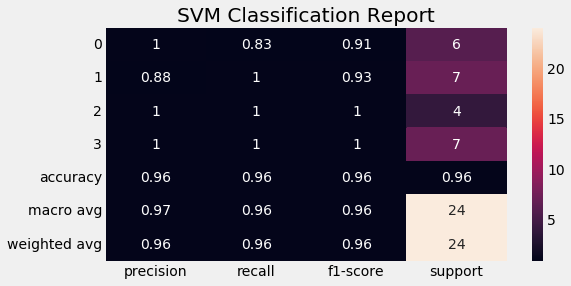

In [ ]:
clf_report1 = classification_report(y_test, svm_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report1).T, annot=True,cmap="rocket")
plt.title("SVM Classification Report")
plt.show()


# **3. RandomForestClassifier**

In [ ]:
rf =RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=5,max_features='auto',random_state=None,
 class_weight="balanced")
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classification Train Accuracy: {}%".format(round(rf.score(X_train,y_train)*100,2)))
print("Random Forest Classification Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
rf_cm = confusion_matrix(y_test, rf_prediction)
print("Classification Report:\n")
print(classification_report(y_test, rf_prediction))

Random Forest Classification Train Accuracy: 100.0%
Random Forest Classification Test Accuracy: 91.67%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.78      1.00      0.88         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.94      0.92      0.92        24



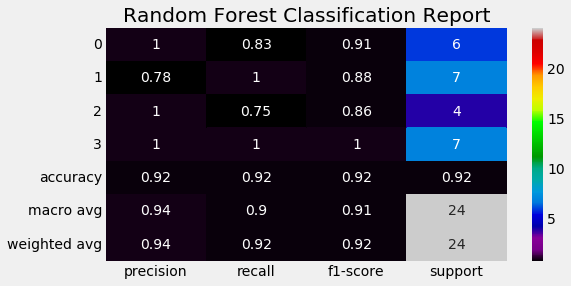

In [ ]:
clf_report2 = classification_report(y_test, rf_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report2).T, annot=True,cmap="nipy_spectral")
plt.title("Random Forest Classification Report")
plt.show()

# **Hyper Parameter Tunning GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_ = GridSearchCV(estimator =RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=5,max_features='auto',random_state=None,class_weight="balanced"),
                            param_grid = {'criterion':['entropy','gini'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}, cv=5)
grid_search_.fit(X_train,y_train)
print(grid_search_.best_params_)
print(grid_search_.best_score_)

{'criterion': 'entropy', 'max_depth': 1}
1.0


In [ ]:
train_accuracy_1=[]
test_accuracy_1=[]
for depth in range(1,10):
    model_2=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=2,max_features='auto',random_state=None,
 class_weight="balanced")
    model_2.fit(X_train,y_train)
    train_accuracy_1.append(model_2.score(X_train,y_train))
    test_accuracy_1.append(model_2.score(X_test,y_test))

Text(0, 0.5, 'performance')

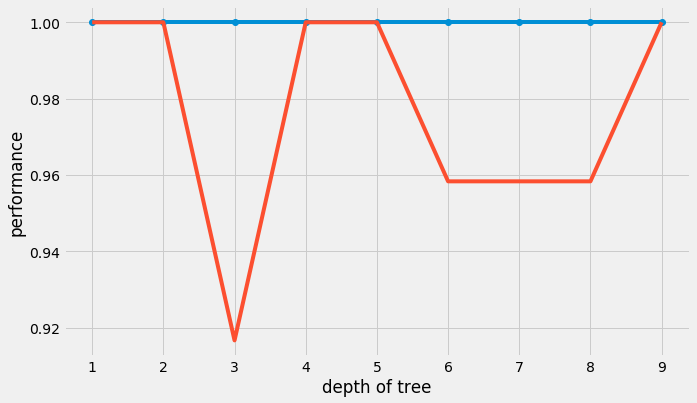

In [ ]:
frame_1=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy_1,'test_acc':test_accuracy_1})
plt.figure(figsize=(10,6))
plt.plot(frame_1["max_depth"],frame_1["train_acc"],marker='o')
plt.plot(frame_1["max_depth"],frame_1["test_acc"])
plt.xlabel("depth of tree")
plt.ylabel("performance")

# **4.DecisionTreeClassifier**

In [ ]:
dt= OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', class_weight = "balanced",splitter='best',max_depth=None))
dt.fit(X_train, y_train)
dt_train_predict=dt.predict(X_train)
dt_prediction = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classification Train Accuracy: {}%".format(round(dt.score(X_train,y_train)*100,2)))
print("Decision Tree Classification Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))
dt_cm = confusion_matrix(y_test, dt_prediction)
print("Classification Report:Train data\n")
print(classification_report(y_train,dt_train_predict))
print("----------------------------------------------------\n")
print("Classification Report:Test data\n")
print(classification_report(y_test, dt_prediction))

Decision Tree Classification Train Accuracy: 100.0%
Decision Tree Classification Test Accuracy: 100.0%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

----------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg   

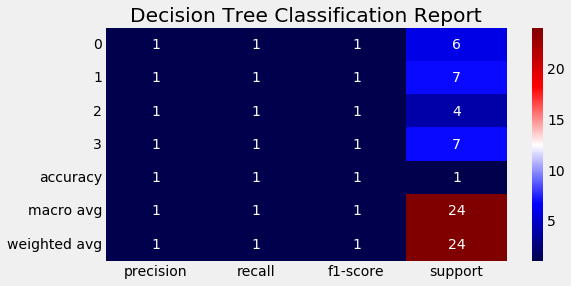

In [ ]:
clf_report3 = classification_report(y_test, dt_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report3).T, annot=True,cmap="seismic")
plt.title("Decision Tree Classification Report")
plt.show()

# **5.MultinomialNB**

In [ ]:
clf =MultinomialNB(alpha=1, fit_prior=False, class_prior=None).fit(X_train, y_train)
train_predict=clf.predict(X_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("Classification report for Train data classifier %s:\n%s\n" % (clf, metrics.classification_report(y_train,train_predict)))

print("--------------------------------------------------\n")

print("Classification report for Test data classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
nb_score = clf.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, prediction)

Accuracy of MultinomialNB Classifier on training set: 1.00
Accuracy of MultinomialNB Classifier on test set: 0.96
Classification report for Train data classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55


--------------------------------------------------

Classification report for Test data classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         4
    

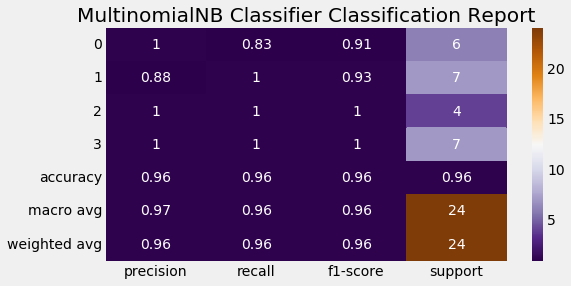

In [ ]:
clf_report4 = classification_report(y_test, prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report4).T, annot=True,cmap="PuOr_r")
plt.title("MultinomialNB Classifier Classification Report")
plt.show()

# **6.KNeighborsClassifier**

In [ ]:
knn =KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_train_predict=knn.predict(X_train)

knn_prediction = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print("KNN Classification Train Accuracy: {}%".format(round(knn.score(X_train,y_train)*100,2)))
print("KNN Classification Test Accuracy: {}%".format(round(knn.score(X_test,y_test)*100,2)))
knn_cm = confusion_matrix(y_test, knn_prediction)
print('Classification Report:Train data\n')
print(classification_report(y_train, knn_train_predict))
print("------------------------------------------------------------\n")
print('Classification Report:Test data\n')

print(classification_report(y_test, knn_prediction))

KNN Classification Train Accuracy: 100.0%
KNN Classification Test Accuracy: 95.83%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

------------------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       0.88      1.00      0.93         7

    accuracy                           0.96        24
   macro avg       0.97    

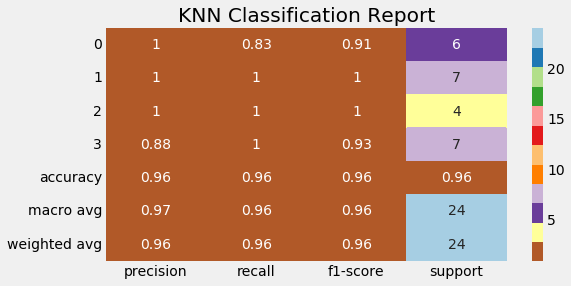

In [ ]:
clf_report5 = classification_report(y_test, knn_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report5).T, annot=True,cmap="Paired_r")
plt.title("KNN Classification Report")
plt.show()

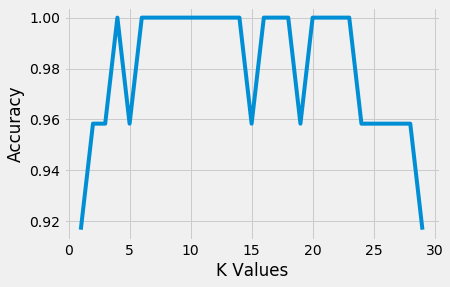

In [ ]:
#Find Best K Value

score_list = []
for each in range(1,30):
    knn2 =KNeighborsClassifier(n_neighbors=each, 
                                                   weights='uniform',p=2,metric='minkowski')
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))
plt.plot(range(1,30), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

# **7. XGBClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [ ]:
xgb_classifer= XGBClassifier(n_estimators=200,max_depth=6,booster="gbtree",learning_rate=0.005)
xgb_classifer.fit(X_train,y_train)
xgb_train_predict=xgb_classifer.predict(X_train)
xgb_prediction = xgb_classifer.predict(X_test)
xgb_score = xgb_classifer.score(X_test, y_test)
print("\n")
print("XGB Classification Train Accuracy: {}%".format(round(xgb_classifer.score(X_train,y_train)*100,2)))
print("XGB Classification Test Accuracy: {}%".format(round(xgb_classifer.score(X_test,y_test)*100,2)))
xgb_classifer_cm = confusion_matrix(y_test, xgb_prediction)
print("Classification Report:Train data\n")
print(classification_report(y_train, xgb_train_predict))
print("------------------------------------------------------\n")
print("Classification Report:Test data\n")
print(classification_report(y_test, xgb_prediction))



XGB Classification Train Accuracy: 100.0%
XGB Classification Test Accuracy: 87.5%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

------------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      1.00      1.00         7
           2       1.00      0.25      0.40         4
           3       1.00      1.00      1.00         7

    accuracy                           0.88        24
   macro avg       0.92      0.8

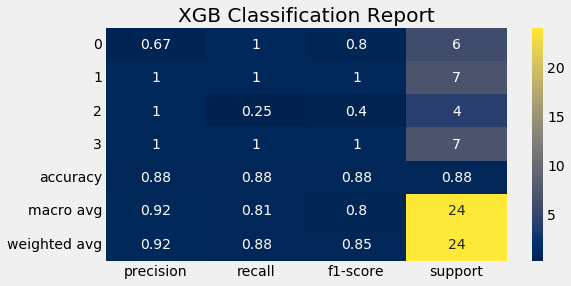

In [ ]:
clf_report6 = classification_report(y_test, xgb_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report6).T, annot=True,cmap="cividis")
plt.title("XGB Classification Report")
plt.show()

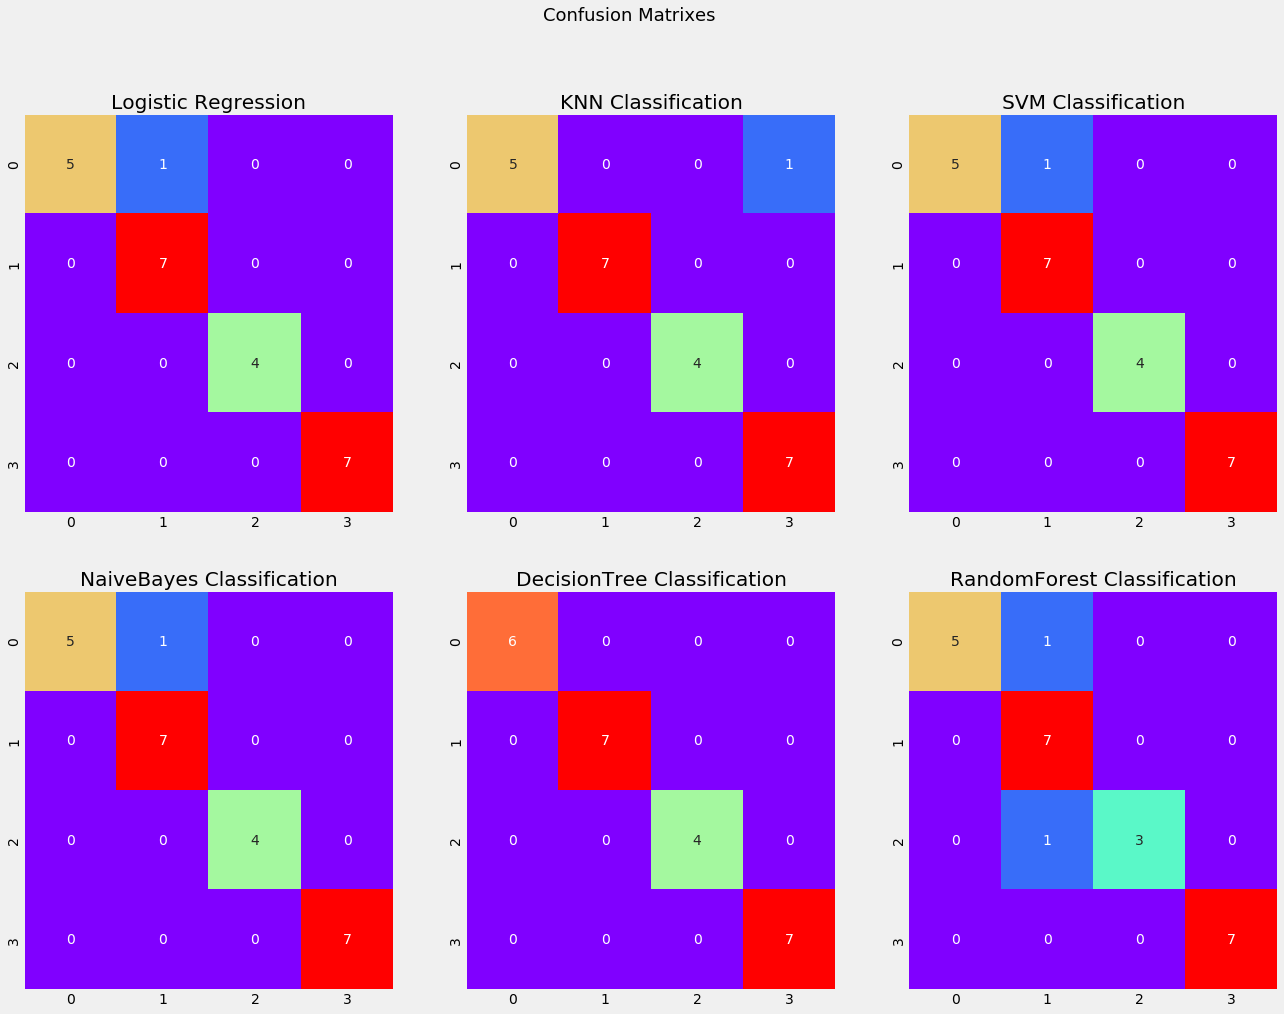

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes", fontsize=18)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,2)
plt.title("KNN Classification")
sns.heatmap(knn_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,3)
plt.title("SVM Classification")
sns.heatmap(svm_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,4)
plt.title("NaiveBayes Classification")
sns.heatmap(nb_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,5)
plt.title("DecisionTree Classification")
sns.heatmap(dt_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,6)
plt.title("RandomForest Classification")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.show()

In [ ]:
TN = [lr_cm[0,0], knn_cm[0,0], svm_cm[0,0], nb_cm[0,0], dt_cm[0,0], rf_cm[0,0],xgb_classifer_cm[0,0]]
FP = [lr_cm[0,1], knn_cm[0,1], svm_cm[0,1], nb_cm[0,1], dt_cm[0,1], rf_cm[0,1],xgb_classifer_cm[0,1]]
FN = [lr_cm[1,0], knn_cm[1,0], svm_cm[1,0], nb_cm[1,0], dt_cm[1,0], rf_cm[1,0],xgb_classifer_cm[1,0]]
TP = [lr_cm[1,1], knn_cm[1,1], svm_cm[1,1], nb_cm[1,1], dt_cm[1,1], rf_cm[1,1],xgb_classifer_cm[1,1]]
Accuracy = [lr_score, knn_score, svm_score, nb_score, dt_score, rf_score,xgb_score]
#MSE = [lr_mse, knn_mse, svm_mse, nb_mse, dt_mse, rf_mse]
Classification = ["Logistic Regression", "KNN Classification", "SVM Classification", "Naive Bayes Classification", 
                  "Decision Tree Classification", "Random Forest Classification","Xgboost Classifier"]
list_matrix = [Classification, TN, FP, FN, TP, Accuracy]
list_headers = ["Model", "TN", "FP", "FN", "TP", "Accuracy"]
zipped = list(zip(list_headers, list_matrix))
data_dict = dict(zipped)
df_1=pd.DataFrame(data_dict)

In [ ]:
df_1

,Model,TN,FP,FN,TP,Accuracy
0,Logistic Regression,5,1,0,7,0.958333
1,KNN Classification,5,0,0,7,0.958333
2,SVM Classification,5,1,0,7,0.958333
3,Naive Bayes Classification,5,1,0,7,0.958333
4,Decision Tree Classification,6,0,0,7,1.000000
5,Random Forest Classification,5,1,0,7,0.916667
6,Xgboost Classifier,6,0,0,7,0.875000


In [ ]:
trace1 = {
    'x':df_1.Model,
    'y':df_1.TN,
    'name':'True Negative',
    'type':'bar'}

trace2 = {
    'x':df_1.Model,
    'y':df_1.FP,
    'name':'False Positive',
    'type':'bar'}

trace3 = {
    'x':df_1.Model,
    'y':df_1.FN,
    'name':'False Negative',
    'type':'bar'}

trace4 = {
    'x':df_1.Model,
    'y':df_1.TP,
    'name':'True Positive',
    'type':'bar'}

graph = [trace1, trace2, trace3, trace4];
layout = {
  'xaxis': {'title': 'Classification Models'},
  'barmode': 'relative',
  'title': 'Confusion Matrix Values of Classification Models'
};
fig = go.Figure(data = graph, layout = layout)
iplot(fig)

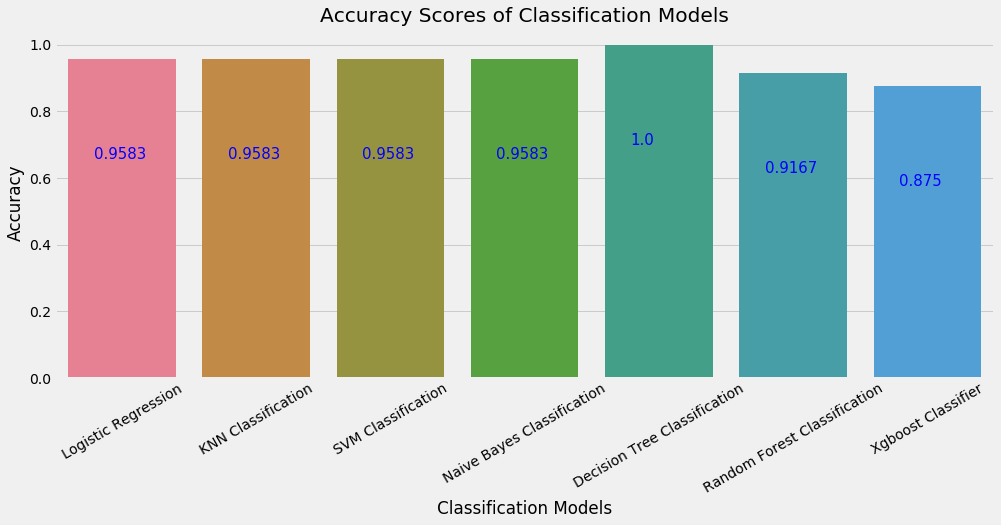

In [ ]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=df_1.Model, y=df_1.Accuracy, palette =sns.color_palette("husl", 9) )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()
#sns.cubehelix_palette(len(df_1.Model)

In [87]:
skill_set=["SQL Server","SQL", "T-SQL","SAS", "R", "Python","MariaDB"," AWS RDS (Athena)","MS Excel", "Tableau","XML", "XSLT", "EIB"
           ,"Oracle","PL/SQL","PeopleSoft HCM","SQL Developer","SQL SERVER DEVELOPER","AWS Redshift","HCM","FCM","Microsoft Business Intelligence Tools(MSBI)",
           "HTML", "CSS3", "XML", "JavaScript", "JSON", "React JS", "Node.js"]

In [88]:
for i in range(len(skill_set)):
    skill_set[i] = skill_set[i].lower()
print(skill_set)

['sql server', 'sql', 't-sql', 'sas', 'r', 'python', 'mariadb', ' aws rds (athena)', 'ms excel', 'tableau', 'xml', 'xslt', 'eib', 'oracle', 'pl/sql', 'peoplesoft hcm', 'sql developer', 'sql server developer', 'aws redshift', 'hcm', 'fcm', 'microsoft business intelligence tools(msbi)', 'html', 'css3', 'xml', 'javascript', 'json', 'react js', 'node.js']


In [89]:
import nltk
import spacy
import pickle
import random
from spacy import displacy
import spacy
from spacy import schemas
from spacy import Dict
from spacy import displacy
from spacy.lang.en.stop_words import  STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
!pip install spacy-transformers
!python3 -m spacy download en_core_web_trf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 460.3 MB 20 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [90]:
import docx
import glob
import warnings
warnings.filterwarnings("ignore")
import spacy
import pickle
import random
import docs
from spacy import displacy
import docx
import spacy
from spacy import schemas
from spacy import Dict
from spacy import displacy
from spacy.lang.en.stop_words import  STOP_WORDS
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import doc
import textract
import re
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from spacy.matcher import Matcher
#nltk.download('stopwords')
#nltk.download('wordnet')

In [91]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
!pip install spacy==(last version of spacy(3.2.4)) 
import spacy_transformers
nlp=spacy.load("en_core_web_trf")
import doc
import textract
import re
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from spacy.matcher import Matcher
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `pip install spacy==(last version of spacy(3.2.4)) '


In [95]:
resume = text 
noun_chunks = resume.noun_chunks
def extract_skills(resume_text):
    nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
    tokens = [token.text for token in nlp_text if not token.is_stop]
    
    
     
    
    
    skills = skill_set
    
    skillset = []
    
    # check for one-grams
    for token in tokens:
        if token in skills:
            skillset.append(token)
    
    # check for bi-grams and tri-grams
    for token in noun_chunks:
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    
    return [i.capitalize() for i in set([i.lower() for i in skillset])]

In [96]:
extract_skills(text)

['Html', 'Javascript']

In [97]:
for i in range(df.shape[0]):
    resume =nlp(df["Resumes"][i])
    noun_chunks = resume.noun_chunks
    def extract_skills(resume_text):
        nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
        tokens = [token.text for token in nlp_text if not token.is_stop]
    
    
     
    
    # extract values
        skills = skill_set
    
        skillset = []
    
    # check for one-grams
        for token in tokens:
            if token in skills:
                skillset.append(token)
    
    # check for bi-grams and tri-grams
        for token in noun_chunks:
            token = token.text.lower().strip()
            if token in skills:
                skillset.append(token)
    
        return [i.capitalize() for i in set([i.lower() for i in skillset])]
    

In [98]:
df["Skill"]=df["Resumes"].apply(extract_skills)

In [99]:
df

,Resumes,Category,Skill
0,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume,"[Xslt, Html, Javascript]"
1,ui developer react js developer name krishna p...,React JS Developer Resume,"[Json, Xml, Html, Javascript]"
2,kotani durga prasad objective aspirant positio...,React JS Developer Resume,"[Json, Html, Javascript]"
3,mareedu lokesh babu professional overview arou...,React JS Developer Resume,"[Html, Javascript]"
4,haripriya battina experience ui developer reac...,React JS Developer Resume,"[Sql, R, Html, Javascript]"
...,...,...,...
74,g himaja career objective work towards achievi...,Workday Resume,"[Hcm, Html, Xml, Eib, Xslt]"
75,hima mendu career objective continue growing k...,Workday Resume,"[Eib, Hcm]"
76,chinna subbarayudu dob th march nationality in...,Workday Resume,"[Sql, Hcm, Xml, Oracle, Eib, Xslt]"
77,harikrishna akula summary years experience aro...,Workday Resume,"[Sql, Hcm, Xml, Oracle, Eib, Xslt]"


In [100]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (df['Skill'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
[Html, Javascript]                         12
[Eib, Xml, Hcm, Xslt]                       8
[Sql]                                       7
[R, Hcm, Oracle]                            5
[R, Sql]                                    4
[Sql, Oracle]                               3
[Sql, Hcm, Oracle]                          3
[Sql, R, Hcm, Oracle]                       2
[Json, Xml, Html, Javascript]               2
[Sql, Hcm, Xml, Oracle, Eib, Xslt]          2
[Hcm, Xml, Oracle, Eib, Xslt]               2
[Sql, R]                                    2
[Eib, Hcm]                                  2
[Json, Html, Javascript]                    2
[Sql, Eib, Xslt, Hcm]                       1
[Sql, Python, Sas, Mariadb, R, Tableau]     1
[Sql, Hcm, Fcm, Xml, Eib, Xslt]             1
[Sql, Hcm, Xml, Eib, Xslt]                  1
[R, Hcm, Eib]                               1
[Hcm, Html, Xml, Eib, Xslt

In [92]:
text=nlp(df["Resumes"][0])

In [93]:
displacy.render(text, style = "ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">kamalakar reddy linked www linkedin com kamalakar reddy professional summary years experience ui development enterprise applications web applicationsrelated technologies experience development coding maintenance design implementation web applications using html css javascript j query react js redux well versed designing websites web applications well versed different project management tools e g jira git bit bucket tested cross browser design issues fixed major layout bugs supported browsers self motivated good communication interpersonalskills ability work independently multitasking without negative impact timelines orquality work experience march till date role ui developer enlume technologies hyderabad august march role software engineer fortunapix private limitd hyderabad projects title monarch tractor description monarch tractor impacts environment exactly intended without side effects application helpful farmers get 

In [94]:
for ent in text.ents:
  print(f'{ent.label_.upper():{20}} - {ent.text}')

PERSON               - sname murahari reddy
NORP                 - indian
GPE                  - telugu
NORP                 - english
GPE                  - hindi
GPE                  - madhapur
GPE                  - hyderabad
GPE                  - hyderabad
PERSON               - kamalakar reddy


In [101]:
matcher = Matcher(nlp.vocab)

In [102]:
def extract_name(resume_text):
    nlp_text = nlp(resume_text)
    
    # First name and Last name are always Proper Nouns
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    
    matcher.add('NAME', [pattern])
    
    matches = matcher(nlp_text)
    
    for match_id, start, end in matches:
        span = nlp_text[start:end]
        return span.text
print('Name: ',extract_name(text).capitalize())

Name:  Kamalakar reddy


In [103]:
for i in range(df.shape[0]):
    
    def extract_name(resume_text):
        nlp_text = nlp(resume_text)
    
    # First name and Last name are always Proper Nouns
        pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    
        matcher.add('NAME', [pattern])
    
        matches = matcher(nlp_text)
    
        for match_id, start, end in matches:
            span = nlp_text[start:end]
            return span.text.capitalize()
print('Name: ',extract_name(text).capitalize())

Name:  Kamalakar reddy


In [104]:
df["Name"]=df["Resumes"].apply(extract_name)

In [105]:
df.head(40)

,Resumes,Category,Skill,Name
0,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume,"[Xslt, Html, Javascript]",Kamalakar reddy
1,ui developer react js developer name krishna p...,React JS Developer Resume,"[Json, Xml, Html, Javascript]",React js
2,kotani durga prasad objective aspirant positio...,React JS Developer Resume,"[Json, Html, Javascript]",Kotani durga
3,mareedu lokesh babu professional overview arou...,React JS Developer Resume,"[Html, Javascript]",Mareedu lokesh
4,haripriya battina experience ui developer reac...,React JS Developer Resume,"[Sql, R, Html, Javascript]",Haripriya battina
5,kanumuru deepak reddy career objective secure ...,React JS Developer Resume,"[Json, Html, Javascript]",Kanumuru deepak
6,maryala vinay reddy professional summary years...,React JS Developer Resume,"[Html, Javascript]",Maryala vinay
7,thirupathamma balla summary year experience re...,React JS Developer Resume,"[Sql, Json, Javascript]",Thirupathamma balla
8,venkatalakshmi pedireddy software developer ex...,React JS Developer Resume,"[Html, Javascript]",Venkatalakshmi pedireddy
9,kambala sai surendra summary project basic kno...,React JS Developer Resume,"[Html, Javascript]",Kambala sai


In [106]:
for i in range(df.shape[0]):
    resume =nlp(df["Resumes"][i]) 
    noun_chunks = resume.noun_chunks
    def extract_skills_1(resume_text):
        nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
        tokens = [token.text for token in nlp_text if not token.is_stop]
    
    
     
    
    # extract values
        skills = skill_set
    
        skillset = []
        string =""
        
    
    # check for one-grams
        for token in tokens:
            if token in skills:
                skillset.append(token)
                
        string=string+str(skillset.pop())
    # check for bi-grams and tri-grams
        #for token in noun_chunks:
            #token = token.text.lower()
            #if token in skills:
                #skillset.append(token)
                #string=string+str(skillset.pop())
    
        return  string
    

In [107]:
df["Skill_one"]=df["Resumes"].apply(extract_skills_1)

In [108]:
df.head(30)

,Resumes,Category,Skill,Name,Skill_one
0,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume,"[Xslt, Html, Javascript]",Kamalakar reddy,javascript
1,ui developer react js developer name krishna p...,React JS Developer Resume,"[Json, Xml, Html, Javascript]",React js,html
2,kotani durga prasad objective aspirant positio...,React JS Developer Resume,"[Json, Html, Javascript]",Kotani durga,html
3,mareedu lokesh babu professional overview arou...,React JS Developer Resume,"[Html, Javascript]",Mareedu lokesh,html
4,haripriya battina experience ui developer reac...,React JS Developer Resume,"[Sql, R, Html, Javascript]",Haripriya battina,html
5,kanumuru deepak reddy career objective secure ...,React JS Developer Resume,"[Json, Html, Javascript]",Kanumuru deepak,json
6,maryala vinay reddy professional summary years...,React JS Developer Resume,"[Html, Javascript]",Maryala vinay,javascript
7,thirupathamma balla summary year experience re...,React JS Developer Resume,"[Sql, Json, Javascript]",Thirupathamma balla,sql
8,venkatalakshmi pedireddy software developer ex...,React JS Developer Resume,"[Html, Javascript]",Venkatalakshmi pedireddy,javascript
9,kambala sai surendra summary project basic kno...,React JS Developer Resume,"[Html, Javascript]",Kambala sai,javascript


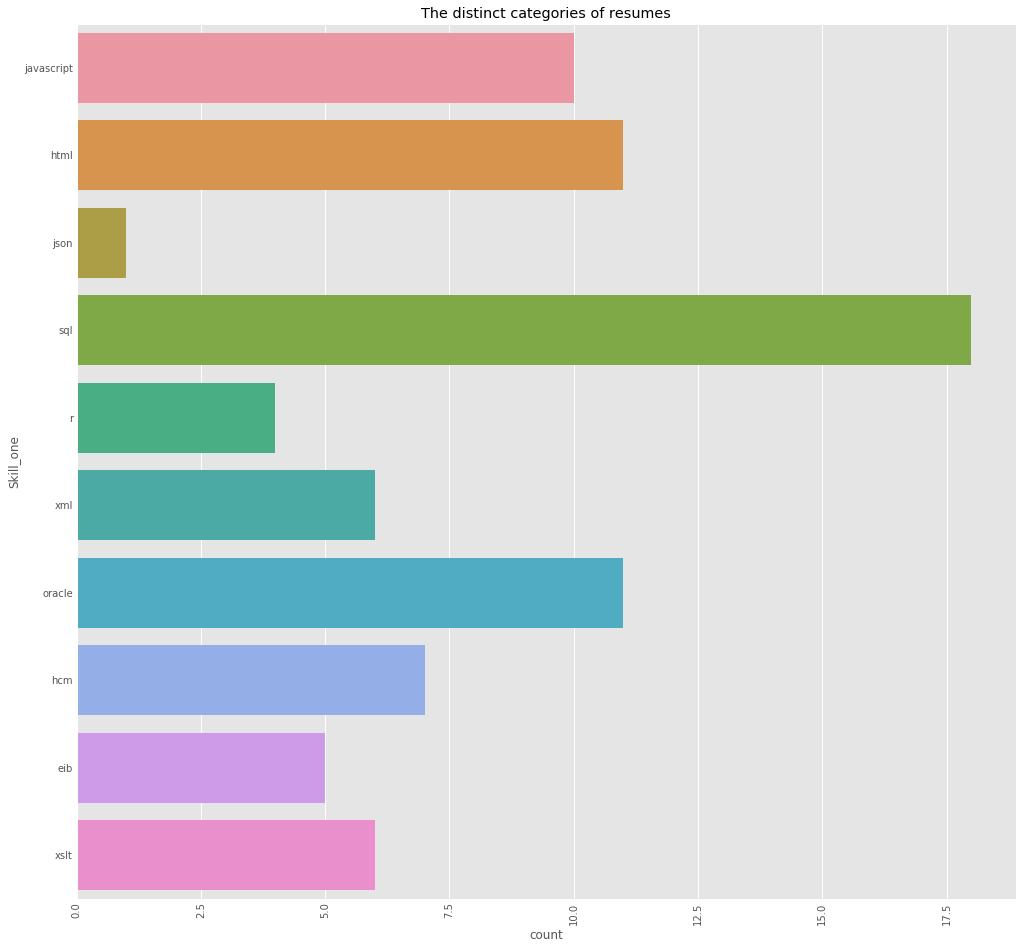

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="Skill_one", data=df)
plt.show()

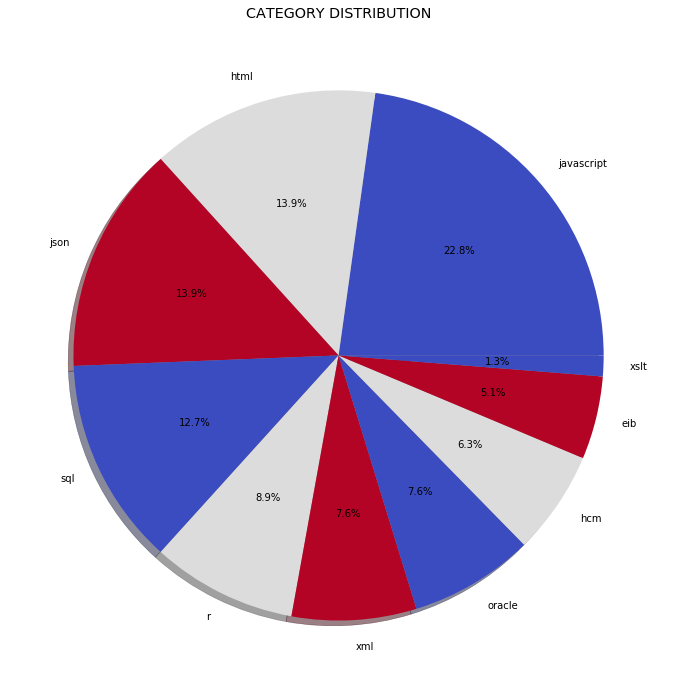

In [202]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Skill_one'].value_counts()
targetLabels  = df['Skill_one'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [5]:
def __init__(self, verbose=False):
        print('Starting Programme')
        fields = ["name", "address", "email", "phone", "mobile", "telephone", "residence status","experience","degree","cainstitute","cayear","caline","b.cominstitute","b.comyear","b.comline","icwainstitue","icwayear","icwaline","m.cominstitute","m.comyear","m.comline","mbainstitute","mbayear","mbaline"]

In [10]:
for i in range(df.shape[0]):
resume =nlp(df["Resumes"][i]) 
    noun_chunks = resume.noun_chunks
    def extract_skills_1(resume_text):
        nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
        tokens = [token.text for token in nlp_text if not token.is_stop]

    # extract values
      skills = skill_set
    
        skillset = []
    
    # check for one-grams
        for token in tokens:
            if token in skills:
                skillset.append(token)
    
    # check for bi-grams and tri-grams
        for token in noun_chunks:
            token = token.text.lower().strip()
            if token in skills:
                skillset.append(token)
    
        return [i.capitalize() for i in set([i.lower() for i in skillset])]
    
    
self.getExperience(self.inputString,info,debug=False)

NameError: ignored

In [47]:
import re
Experience_set=["1"," 2","3", "4","5","6", "7" , "8",'01/2017 - 04/2022','01/07/2017 - 31/07/2017','March 2017 - July 2022','March-July 2020','March 2020 - Current/Present','01/07/2017-31/07/2017','2020-2021','From/Since 2020','From March 2020 to July 2022]']
pattern = r'(((Jan(uary)?|Feb(ruary)?|Mar(ch)?|Apr(il)?|May|June?|July?|Aug(ust)?|Sep(tember)?|Nov(ember)?|Dec(ember)?)|(\d{1,2}\/){0,2})[- ]?\d{4}?)'
""""
for i in resumes:
    res = re.findall(pattern,resume)
    if len(res) > 1:
      print('from',res[0][0],'to',res[1][0])
for i in range(df.shape[0]):
  resume =nlp(df["Resumes"][i]) 
  noun_chunks = resume.noun_chunks
  def extract_skills_1(resume_text):
    nlp_text = nlp(resume_text)
"""""  

'"\nfor i in resumes:\n    res = re.findall(pattern,resume)\n    if len(res) > 1:\n      print(\'from\',res[0][0],\'to\',res[1][0])\nfor i in range(df.shape[0]):\n  resume =nlp(df["Resumes"][i]) \n  noun_chunks = resume.noun_chunks\n  def extract_skills_1(resume_text):\n    nlp_text = nlp(resume_text)\n'

In [48]:
for i in range(len(Experience_set)):
    Experience_set[i] = Experience_set[i].lower()
print(Experience_set)

['1', ' 2', '3', '4', '5', '6', '7', '8', '01/2017 - 04/2022', '01/07/2017 - 31/07/2017', 'march 2017 - july 2022', 'march-july 2020', 'march 2020 - current/present', '01/07/2017-31/07/2017', '2020-2021', 'from/since 2020', 'from march 2020 to july 2022]']


In [56]:
for i in range(df.shape[0]):
    resume =nlp(df["Resumes"][i]) 
    noun_chunks = resume.noun_chunks
    def extract_skills_1(resume_text):
        nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
        tokens = [token.text for token in nlp_text if not token.is_stop]
    
    
     
    
    # extract values
        Exp = Experience_set
    
        Experienceset = []
    
    # check for one-grams
        for token in tokens:
            if token in Exp:
                Experienceset.append(token)
    
    # check for bi-grams and tri-grams
        for token in noun_chunks:
            token = token.text.lower().strip()
            if token in Exp:
                Experienceset.append(token)
    
        return [i.capitalize() for i in set([i.lower() for i in Experienceset])]

    

In [57]:
df["Exp"]=df["Resumes"].apply(extract_skills_1)

In [58]:
df.head(20)

,Resumes,Category,Exp
0,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume,[]
1,ui developer react js developer name krishna p...,React JS Developer Resume,[]
2,kotani durga prasad objective aspirant positio...,React JS Developer Resume,[]
3,mareedu lokesh babu professional overview arou...,React JS Developer Resume,[]
4,haripriya battina experience ui developer reac...,React JS Developer Resume,[]
5,kanumuru deepak reddy career objective secure ...,React JS Developer Resume,[]
6,maryala vinay reddy professional summary years...,React JS Developer Resume,[]
7,thirupathamma balla summary year experience re...,React JS Developer Resume,[]
8,venkatalakshmi pedireddy software developer ex...,React JS Developer Resume,[]
9,kambala sai surendra summary project basic kno...,React JS Developer Resume,[]


In [64]:
for df in Experience_set:
    res = re.findall(pattern,df)
    if len(res) > 0:
     ad= print('from',res[0][0],'to',res[0][0])
    else:
      print([0])

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
from 01/2017 to 01/2017
from 01/07/2017 to 01/07/2017
from  2017 to  2017
from  2020 to  2020
from  2020 to  2020
from 01/07/2017 to 01/07/2017
from 2020 to 2020
from  2020 to  2020
from  2020 to  2020


In [65]:
print(ad)

None


In [50]:
for i in range(df.shape[0]):
    resume =nlp(df["Resumes"][i]) 
    noun_chunks = resume.noun_chunks
    def extract_skills(resume_text):
        nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
        tokens = [token.text for token in nlp_text if not token.is_stop]
    
    
     
    
    # extract values
        Experience = Experience_set
    
        Experience_set = []

        
    
    # check for one-grams
        for token in tokens:
            if token in Experience:
                Experienc_set.append(token)
    
    # check for bi-grams and tri-grams
        for token in noun_chunks:
            token = token.text.lower().strip()
            if token in Experience:
                Experience_set.append(token)
    
        return [i.capitalize() for i in set([i.lower() for i in Experience_set])]
    

In [52]:
df["Experience"]=df["Resumes"].apply(extract_skills)

In [53]:
df.head(20)

,Resumes,Category,Experience
0,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume,[]
1,ui developer react js developer name krishna p...,React JS Developer Resume,[]
2,kotani durga prasad objective aspirant positio...,React JS Developer Resume,[]
3,mareedu lokesh babu professional overview arou...,React JS Developer Resume,[]
4,haripriya battina experience ui developer reac...,React JS Developer Resume,[]
5,kanumuru deepak reddy career objective secure ...,React JS Developer Resume,[]
6,maryala vinay reddy professional summary years...,React JS Developer Resume,[]
7,thirupathamma balla summary year experience re...,React JS Developer Resume,[]
8,venkatalakshmi pedireddy software developer ex...,React JS Developer Resume,[]
9,kambala sai surendra summary project basic kno...,React JS Developer Resume,[]


In [6]:
for sentence in self.lines:
  sen=" ".join([words[0].lower() for words in sentence])
  if re.search('experience',sen):
    sen_tokenised=nltk.word_tokenize(sen)
    tagged= nltk.pos_tag(sen_tokenised)
    entities= nltk.chunk.ne_chunk(tagged)
    for subtree in entities.subtrees():
      for leaf in subtrees.leaves():
        if leaf[1]=='CD':
          experience=leaf[0]



NameError: ignored